In [1]:
import matplotlib.pyplot as plt
import numpy as np

from shower_start import *
shower = CascadeDriver(CascadeEvent(1e4))

Evgen = None
 |                                                  |
 |                 S I B Y L L  2.3d                |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |            Eun-Joo AHN, Felix RIEHN              |
 |      R. ENGEL, A. FEDYNITCH, R.S. FLETCHER,      |
 |       T.K. GAISSER, P. LIPARI, T. STANEV         |
 |                                                  |
 | Publication to be cited when using this program: |
 | Eun-Joo AHN et al., Phys.Rev. D80 (2009) 094003  |
 | F. RIEHN et al., hep-ph: 1912.03300              |
 | last modifications: F. Riehn (05/20/2020)        |

 SIG_AIR_INI: initializing target: (i,A)           1           0 air..
 SIG_AIR_INI: initializing target: (i,A)           2          14 nit..
 SIG_AIR_INI: initializing target: (i,A)           3          16 oxy..


In [2]:
shower.run(2212, 1e9)

In [3]:
final_prt = shower.get_particles()
print(f"Iterations = {shower.get_iterations()}, particles = {len(final_prt)}")

Iterations = 15217, particles = 768304


In [4]:
en_data = []

for i in range(len(final_prt)):
    en_data.append(final_prt[i].energy)
    
etot = 0
for ee in en_data:
    etot += ee
    
print(f"Energy conservation = {abs(etot - 1e9)/1e9}")    

Energy conservation = 1.8420880541563034e-05


Min = 5.27e+06 eV, Max = 1.00e+17 eV


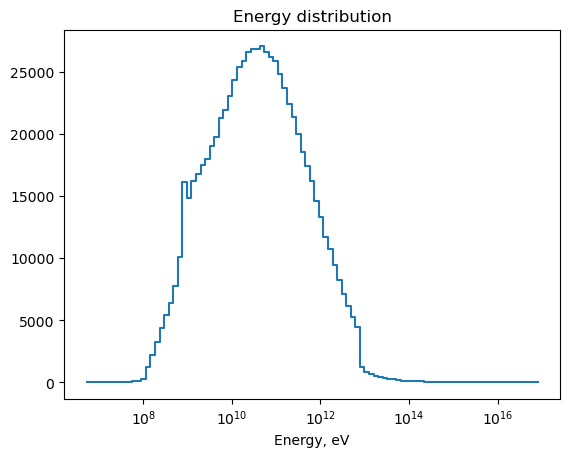

In [35]:
gr, cnt = np.histogram(np.log10(en_data), 100)
plt.semilogx()
plt.step(10**cnt[:-1]*1e9, gr)
plt.title("Energy distribution")
plt.xlabel("Energy, eV")
# plt.loglog(basex = 10)
# plt.stairs(gr,cnt)
# print(10**cnt)
np.min(en_data)*1e9/1e6
print(f"Min = {np.min(en_data)*1e9:0.2e} eV, Max = {np.max(en_data)*1e9:0.2e} eV")  

In [36]:
en_gam = []

for i in range(len(final_prt)):
    if (final_prt[i].pid == 22):
        en_gam.append(final_prt[i].energy)
    
etot = 0
for ee in en_gam:
    etot += ee
    
print(f"Energy of gamma = {etot/1e9}")
print(f"Min = {np.min(en_gam)*1e9:0.2e} eV, Max = {np.max(en_gam)*1e9:0.2e} eV")  

Energy of gamma = 0.0803843395378164
Min = 5.27e+06 eV, Max = 5.88e+15 eV


Text(0.5, 0, 'Energy, eV')

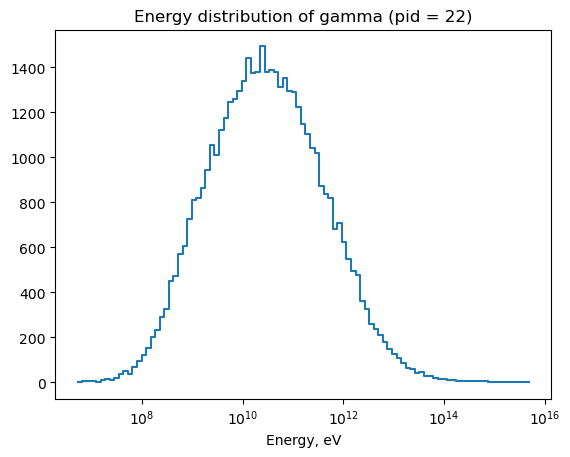

In [7]:
gr, cnt = np.histogram(np.log10(en_gam), 100)
plt.semilogx()
plt.step(10**cnt[:-1]*1e9, gr)
plt.title("Energy distribution of gamma (pid = 22)")
plt.xlabel("Energy, eV")

In [8]:
xm_data = []
heightx = []
conv_h2x = ConvertX2H()

for i in range(len(final_prt)):
    xm_data.append(final_prt[i].xlength)
    heightx.append(conv_h2x(final_prt[i].xlength))

In [9]:
conv_h2x(np.min(xm_data))

24.461892680707237

Text(0.5, 0, 'Height, km')

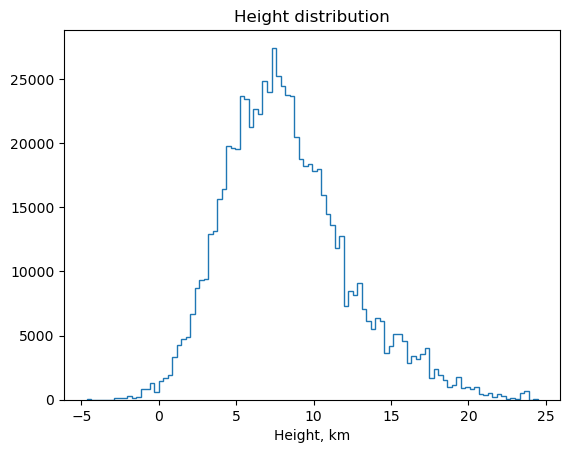

In [10]:
plt.stairs(*np.histogram(heightx, 100))
plt.title("Height distribution")
plt.xlabel("Height, km")

In [11]:
pid_dist = dict()

for prt in final_prt:
    pid_dist[prt.pid] = pid_dist.get(prt.pid, 0) + 1
    
pid_dist = dict(sorted(pid_dist.items(), key=lambda item: item[1], reverse=True))    
print(pid_dist)    

# names = list(data.keys())
# values = list(data.values())

# fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

{111: 216287, 211: 176923, -211: 175934, 22: 46584, 2212: 22027, 321: 19388, 2112: 19244, 310: 19044, 130: 18988, -321: 18180, -2112: 10040, -2212: 9593, 3122: 3344, -3122: 2197, 3222: 1741, 3212: 1702, 3112: 1419, -3212: 1241, -3112: 1206, -3222: 1128, -11: 355, 11: 345, -3322: 312, 3312: 278, -3312: 273, 3322: 256, 13: 50, 12: 49, -14: 46, -13: 42, -12: 39, 14: 38, 3334: 9, -3334: 2}


In [12]:
import particle


all_pdgs = {int(p.pdgid) : f"${p.latex_name}$" for p in particle.Particle.findall()}
# all_pdgs.update(
#     {p.latex_name: int(p.pdgid) for p in particle.Particle.findall()}
# )
# all_pdgs.update(
#     photon=22,
#     Higgs=25,
#     proton=2212,
#     antiproton=-2212,
#     neutron=2112,
#     antineutron=-2112,
# )
# all_pdgs    
# pdg_pname = dict()    
# for item in all_pdgs.items():
#     pdg_pname[item[1]] = item[0]

Text(0.5, 1.0, 'Particle type distribution')

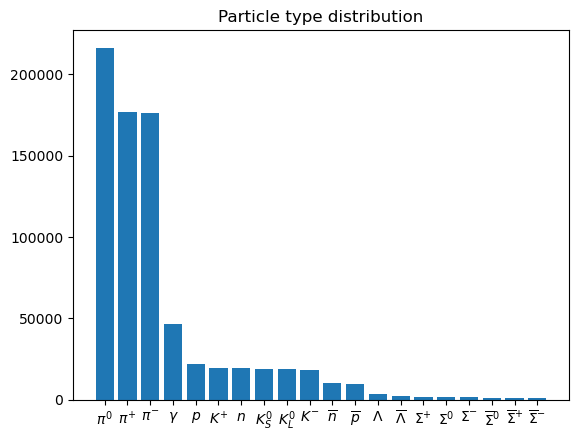

In [13]:
ptypes = [all_pdgs[i] for i in pid_dist.keys()]
pnum = list(pid_dist.values())
plt.bar(ptypes[:20], pnum[:20])
plt.title("Particle type distribution")

In [32]:
pid_dist_e = dict()

for prt in final_prt:
    if prt.energy < 1.3e-1:
        pid_dist_e[prt.pid] = pid_dist_e.get(prt.pid, 0) + 1
    
pid_dist_e= dict(sorted(pid_dist_e.items(), key=lambda item: item[1], reverse=True))   


Text(0.5, 1.0, 'Particle type distribution')

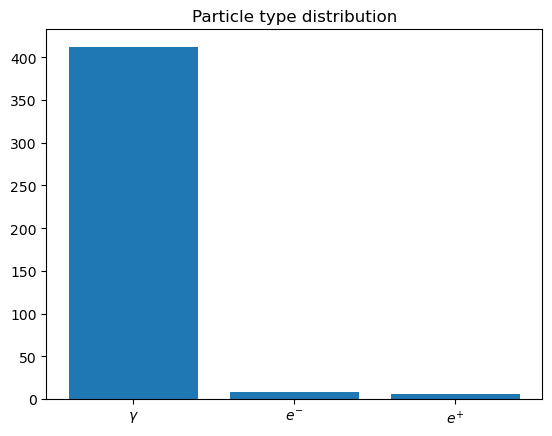

In [33]:
ptypes_e = [all_pdgs[i] for i in pid_dist_e.keys()]
pnum_e = list(pid_dist_e.values())
plt.bar(ptypes_e[:20], pnum_e[:20])
plt.title("Particle type distribution")